In [12]:
import re
import matplotlib.pyplot as plt

def plot_val_losses(log_dict):
    """
    Plot val_loss vs train_time and val_loss vs step
    for multiple log files.

    Args:
        log_dict (dict[str, str]): mapping from title -> log file path
    """
    pattern = re.compile(r"step:(\d+)/\d+\s+val_loss:(\d+\.\d+(?:e[-+]?\d+)?)\s+train_time:(\d+)ms")

    plt.figure(figsize=(12, 5))

    # --- Plot 1: val_loss vs train_time ---
    plt.subplot(1, 2, 1)
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000  # seconds
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(train_times[1:], val_losses[1:], marker="o", label=title, linewidth=1.2, markersize=5, linestyle="-", alpha=1)

    plt.xlabel("Train Time (s)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()

    # --- Plot 2: val_loss vs step ---
    plt.subplot(1, 2, 2)
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(steps[1:], val_losses[1:], marker="o", label=title, linewidth=1.2, markersize=5, linestyle="-", alpha=1)

    plt.xlabel("Step")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [10]:
import re
import matplotlib.pyplot as plt

def plot_val_losses(log_dict):
    """
    Plot val_loss vs wallclock time and val_loss vs step
    for multiple log files.

    Args:
        log_dict (dict[str, str]): mapping from title -> log file path
    """
    pattern = re.compile(r"step:(\d+)/\d+\s+val_loss:(\d+\.\d+(?:e[-+]?\d+)?)\s+train_time:(\d+)ms")

    plt.figure(figsize=(12, 5))

    # --- Plot 1: val_loss vs wallclock time (in minutes) ---
    plt.subplot(1, 2, 1)
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000 / 60  # convert ms → s → minutes
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(train_times[1:], val_losses[1:], marker="o", label=title,
                     linewidth=1.2, markersize=5, linestyle="-", alpha=1)

    plt.xlabel("Wallclock time (8×H100 minutes)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()

    # --- Plot 2: val_loss vs step ---
    plt.subplot(1, 2, 2)
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000 / 60  # minutes
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(steps[1:], val_losses[1:], marker="o", label=title,
                     linewidth=1.2, markersize=5, linestyle="-", alpha=1)

    plt.xlabel("Step")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


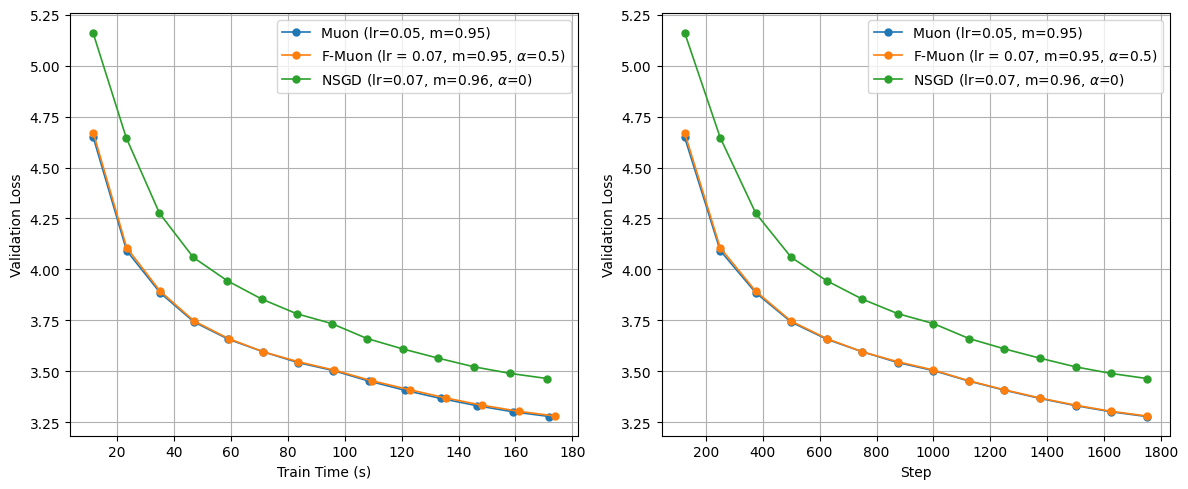

In [13]:
plot_val_losses({"Muon (lr=0.05, m=0.95)": "664f1c87-01af-4a16-b8cd-e7415caadede_baseline.txt",
                # r"F-Muon (lr = 0.07, m=0.96, $\alpha$=0.5)": "1756055159239_007lr_096mom_FMuon.txt",
                r"F-Muon (lr = 0.07, m=0.95, $\alpha$=0.5)": "1756058551408_007lr_095mom.txt",
                # r"F-Muon (lr = 0.05, m=0.95, $\alpha$=-0.1)": "1756059576600_neg_alpha.txt",
                r"NSGD (lr=0.07, m=0.96, $\alpha$=0)" : "1756055424649_007lr_096mom_NSGD.txt"}
                
)


In [14]:
import re
import matplotlib.pyplot as plt

def plot_val_losses(log_dict, output_dir="."):
    """
    Plot val_loss vs wallclock time and val_loss vs step
    for multiple log files, and save as PDF files.

    Args:
        log_dict (dict[str, str]): mapping from title -> log file path
        output_dir (str): directory to save PDF plots
    """
    pattern = re.compile(r"step:(\d+)/\d+\s+val_loss:(\d+\.\d+(?:e[-+]?\d+)?)\s+train_time:(\d+)ms")

    # --- Plot 1: val_loss vs wallclock time (in minutes) ---
    plt.figure(figsize=(6, 5))
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000 / 60  # convert ms → s → min
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(train_times[1:], val_losses[1:], marker="o", label=title,
                     linewidth=1.2, markersize=5, linestyle="-", alpha=1)

    plt.xlabel("Wallclock time (8×H100 minutes)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{output_dir}/val_loss_vs_time.pdf", bbox_inches="tight")
    plt.close()

    # --- Plot 2: val_loss vs step ---
    plt.figure(figsize=(6, 5))
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000 / 60  # minutes
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(steps[1:], val_losses[1:], marker="o", label=title,
                     linewidth=1.2, markersize=5, linestyle="-", alpha=1)

    plt.xlabel("Step")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{output_dir}/val_loss_vs_step.pdf", bbox_inches="tight")
    plt.close()


In [15]:
plot_val_losses({r"Muon (lr=0.05, m=0.95, $\alpha=1$)": "664f1c87-01af-4a16-b8cd-e7415caadede_baseline.txt",
                # r"F-Muon (lr = 0.07, m=0.96, $\alpha$=0.5)": "1756055159239_007lr_096mom_FMuon.txt",
                r"F-Muon (lr = 0.07, m=0.95, $\alpha$=0.5)": "1756058551408_007lr_095mom.txt",
                r"NSGD (lr=0.07, m=0.96, $\alpha$=0)" : "1756055424649_007lr_096mom_NSGD.txt"}
                
)
